# Figures for the paper

In [2]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline

In [3]:
import PIL.Image as Image
import pickle

In [4]:
def plot_trace(data,t,ax=None,c='C0',band= None):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    ax.plot(t,vtracso[:,250],c)
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
    else:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    return(ax)

In [5]:
from matplotlib.patches import ConnectionPatch

In [381]:
with open("../SpineModel/STDP_baseline.pickle","rb") as f:
    fweights,data,dcs,fcat,dis = pickle.load(f)

In [340]:
tdels = [-100,-75,-50,-30,-20,-15,-10,-7.5,-5,-3.5,-2,-1,-0.5,0,0.5,1.0,2.0,2.75,3.5,5.0,7.5,10.0,15.0,20.,30.,50,75,100]

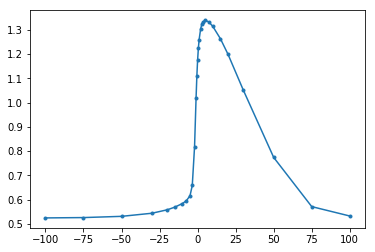

In [143]:
plot(tdels,data[:,4],'.-')
#plot(tdels,data[:,5],'.-')

#fill_between(tdels,data[:,4]+data[:,4+3],data[:,4]+data[:,4-3])

In [341]:
tdels[19]

5.0

In [144]:
for fk in fweights.keys():
    thks = list(fweights[fk].keys())
    break

In [155]:
def wdt(i,th1th2,corrected = False):
    a = [[fk,fweights[fk][th1th2][0][i],fweights[fk][th1th2][1][i]] for fk in fweights.keys()]
    a = array(a)
    if corrected:
        a[:,1] = a[:,1]-a[0,1]
    return(a)

In [304]:
def stdp(wt, A = 500.0):
    r = where(wt[:,1]>0,wt[:,2]/wt[:,1],0.0)
    sel = ~((wt[:,2]>0)*(wt[:,1]>0))
    r[sel] = -wt[sel,1]/A
    r = (r-r[0])
    #r = r/abs(r).max()
    return(r)

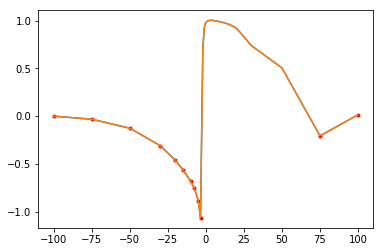

In [303]:
i = randint(500)
ths = (0.35,0.55)
wt = wdt(i,ths)
rp = stdp(wt)
r = where(wt[:,1]>0,wt[:,2]/wt[:,1],0.0)
sel = ~((wt[:,2]>0)*(wt[:,1]>0))
r[sel] = -wt[sel,1]/500.0
plot(wt[:,0],(r-r[0]))
plot(wt[sel,0],(r[sel]-r[0]),'r.')

plot(wt[:,0],rp)

In [278]:
i

239

In [218]:
i

301

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, 'dw')

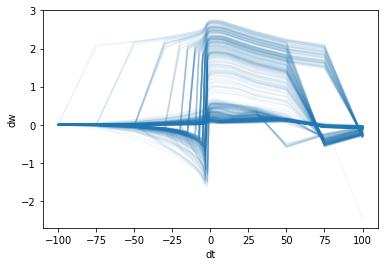

In [351]:
i = randint(500)
figure()
ths = (0.3,0.5)
for i in range(500):
    wt = wdt(i,ths)
    rp = stdp(wt)
    plot(wt[:,0],rp,'C0-',alpha=0.05)
xlabel('dt')
ylabel('dw')


/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, 'dw')

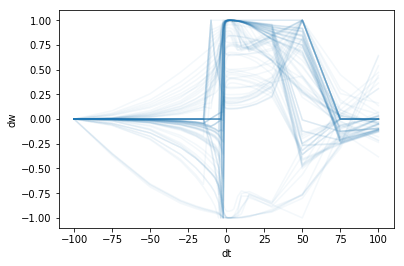

In [346]:
i = randint(500)
i = 239
figure()
ths = (0.3,0.55)
for ths in thks:
    wt = wdt(i,ths)
    rp = stdp(wt)
    plot(wt[:,0],rp/abs(rp).max(),'C0',alpha=0.05)
xlabel('dt')
ylabel('dw')


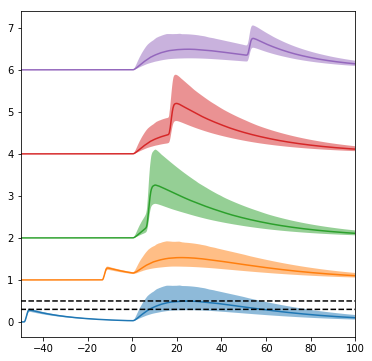

In [376]:
figure(figsize=(6,6))
tdels = [-50,-15,5,15.0,50]
hi = [0,1,2,4.,6.,7.0]
t0 = 300
#fig,ax = subplots(nrows=7,ncols=4,figsize=(14,7*3))
for i,td in enumerate(tdels):
    d = fcat[td]
    #ax[iy,ix].
    plot(d[:,0]-t0,d[:,1]+hi[i])
    #ax[iy,ix].plot(array(trec)-toffset-ton,ctracso[:,25],'C0-')
    #ax[iy,ix].
    fill_between(d[:,0]-t0,d[:,2]+hi[i],d[:,3]+hi[i],alpha=0.5)
xlim(250-t0,400-t0)
plot(d[:,0]-t0,d[:,0]*0+.5,'k--')
plot(d[:,0]-t0,d[:,0]*0+.3,'k--')

In [490]:
def signchanges(x):
    s0 = sign(x[1])
    i = 0
    while s0==0 and i<len(x):
        s0 = sign(x[i])
        i += 1
    if i==len(x):
        return(zeros((1,3)))
        
    sel = arange(len(x)-1)[(x[1:]*x[:-1])<0]
    res = column_stack((concatenate(([i],sel)),ones(len(sel)+1)))
    if abs(s0)>0:
        res[arange(0,res.shape[0],2),1] = s0
        res[arange(1,res.shape[0],2),1] = -s0
    else:
        print('hello?')

    return(res)
def labeld(x):
    l = ''
    for xt in x:
        if xt==-1:
            l += 'D'
        elif xt == 1:
            l +='P'
    return(l)

In [473]:
st = signchanges(rp)
labeld(st[:,1])

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


'DPD'

In [387]:

labels = [labeld(signchanges(stdp(wdt(i,ths)))[:,1]) for i in range(500)]

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [393]:
labelsn = array(labels)
labelsn[labelsn=='PD'] = 1
labelsn[labelsn=='DPD'] = 0
labelsn[labelsn=='DP'] = 2
labelsn = array(labelsn,dtype=int)

In [410]:
dis.keys()

dict_keys(['#Bch', 'Dsb', 'Dss', 'd_interSp', 'Vtot', 'Vh', 'Ln', 'SA', 'nPSD', 'A1', 'A2', 'GPHN SNR', 'DiS-EMchk', 'Lneck', 'maxDneck', 'minDneck', 'meanDneck', 'Rneck', 'Lhead', 'maxDhead', 'minDhead', 'meanDhead', 'Ah', 'Rhead', 'L', 'D', 'AhA0'])

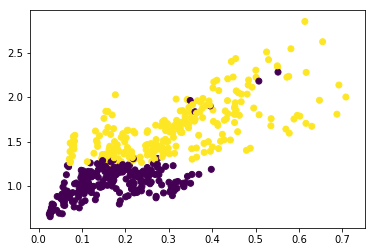

In [415]:
scatter(dis['A1'],dcs[19,:],c=labelsn)

In [421]:
i = 0

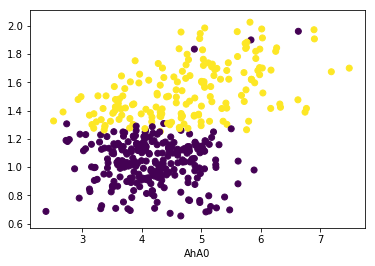

In [449]:
keys = list(dis.keys())
sel = dis['A1']<.4
scatter(dis[keys[i]][sel],dcs[19,sel],c=labelsn[sel])
xlabel(keys[i])
i +=1

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


Text(0.5, 0, 'A2')

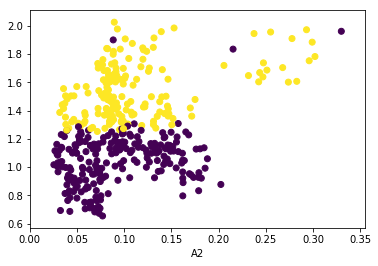

In [443]:
keys = list(dis.keys())
sel = (dis['A1']<.4)*(dis['minDhead']<180)
scatter(dis['A2'][sel],dcs[19,sel],c=labelsn[sel])
xlabel('A2')

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


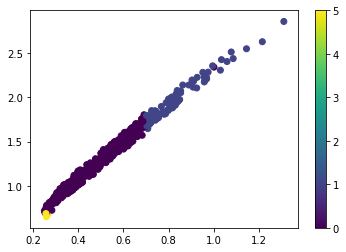

In [460]:
ths = (0.3,0.55)
ths = (0.3,0.70)

labels = [labeld(signchanges(stdp(wdt(i,ths)))[:,1]) for i in range(500)]

labelsn = array(labels)
labelsn[labelsn=='PD'] = 1
labelsn[labelsn=='DPD'] = 0
labelsn[labelsn=='DP'] = 2
labelsn[labelsn=='DPDP'] = 3
labelsn[labelsn=='PDPD'] = 4
labelsn[labelsn=='D'] = 5

labelsn = array(labelsn,dtype=int)

scatter(dcs[0,:],dcs[19,:],c=labelsn)
colorbar()

In [494]:
ths = (0.3,0.70)

dd = zeros((len(thks),3))
for k,ths in enumerate(thks):
    labels = [labeld(signchanges(stdp(wdt(i,ths)))[:,1]) for i in range(500)]

    labelsn = array(labels)
    dd[k,:] =concatenate((ths,[(labelsn=='DPD').sum()/500.0]))
    

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


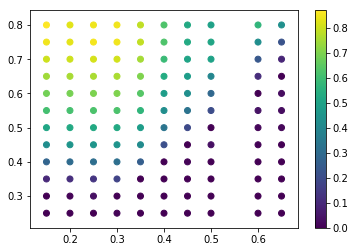

In [495]:
scatter(dd[:,0],dd[:,1],c=dd[:,2])
colorbar()

In [514]:
cm = get_cmap('cool')

In [515]:
x = dis['Vh']
x = (x-x.min())/(x.max()-x.min())

(-2, 3.5)

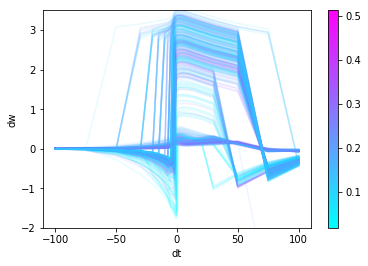

In [516]:
figure()
ths = (0.25,0.6)
for i in range(500):
    wt = wdt(i,ths)
    rp = stdp(wt)
    plot(wt[:,0],rp,c=cm(x[i]),alpha=0.1)
xlabel('dt')
ylabel('dw')
scatter(x*0,x*0-3,c = dis['Vh'],cmap=cm)
colorbar()
ylim(-2,3.5)


ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = ['PD' 'DPD' 'DPD' 'DPD' 'DP' 'DPD' 'DP' 'DP' 'DPD' 'DP' 'PD' 'DPD' 'DPD'
 'DP' 'DPD' 'DP' 'DPD' 'DP' 'DP' 'DPD' 'DPD' 'DP' 'DP' 'DP' 'DPD' 'DP'
 'DPD' 'DPD' 'DPD' 'DP' 'DPD' 'DPD' 'DP' 'DPD' 'DP' 'DPD' 'DP' 'D' 'DPD'
 'DPD' 'DPD' 'DP' 'DPD' 'DPD' 'DP' 'DPD' 'DPD' 'DP' 'PD' 'DPD' 'DP' 'DPD'
 'DPD' 'DP' 'DP' 'DP' 'DP' 'DPD' 'PD' 'DPD' 'DPD' 'DP' 'DP' 'D' 'DPD' 'DP'
 'DP' 'DPD' 'DP' 'PD' 'DP' 'DP' 'DPD' 'DP' 'PD' 'DP' 'DP' 'PD' 'DPD' 'DP'
 'D' 'DP' 'DPD' 'PD' 'DP' 'DPD' 'DPD' 'DP' 'DP' 'DP' 'DPD' 'PD' 'DP' 'DPD'
 'DPD' 'DPD' 'DPD' 'DPD' 'DP' 'DP' 'DPD' 'DPD' 'DPD' 'DPD' 'DPD' 'DPD'
 'DPD' 'DPD' 'DP' 'DPD' 'DPD' 'DPD' 'DP' 'PD' 'DPD' 'DPDP' 'DPD' 'DP' 'DP'
 'PD' 'DP' 'DPD' 'DP' 'DP' 'DPD' 'DP' 'DPD' 'DPDP' 'D' 'DP' 'DP' 'DPD'
 'DP' 'DP' 'DPD' 'DPD' 'D' 'PD' 'DPD' 'DP' 'DP' 'DPD' 'DPD' 'DP' 'DP' 'DP'
 'DPD' 'DPD' 'DPD' 'DPD' 'DPD' 'DPD' 'DPD' 'PD' 'DPD' 'DP' 'DPD' 'DPD'
 'DP' 'DP' 'DP' 'D' 'PD' 'PD' 'PD' 'DPD' 'DPD' 'DPD' 'DP' 'DPD' 'DPD' 'D'
 'PD' 'PD' 'DP' 'DPD' 'DP' 'PD' 'DPD' 'DP' 'PD' 'PD' 'PD' 'DPD' 'DP' 'DP'
 'DP' 'DPDP' 'DPD' 'DP' 'DP' 'DP' 'PD' 'DPD' 'PDP' 'DPD' 'D' 'DPDP' 'DP'
 'DPDP' 'DPD' 'DPD' 'DPD' 'DP' 'DPD' 'DPD' 'DP' 'DPD' 'PD' 'DPD' 'DPD'
 'DPD' 'DPD' 'DP' 'DPD' 'DPD' 'DPDP' 'PDP' 'DPD' 'DP' 'PD' 'DP' 'DPD'
 'DPD' 'DPD' 'DPD' 'DP' 'DP' 'DPD' 'DP' 'DPD' 'DP' 'PD' 'DP' 'DPD' 'DPD'
 'DP' 'DP' 'DP' 'DPD' 'DP' 'DPD' 'DP' 'DP' 'DP' 'DPD' 'PD' 'DPD' 'DP' 'DP'
 'DPD' 'DPDP' 'DPD' 'DP' 'DP' 'DPD' 'D' 'DP' 'DPD' 'DPD' 'DP' 'DP' 'DPD'
 'D' 'DP' 'DP' 'DPD' 'DPD' 'DP' 'DPD' 'PD' 'DPD' 'PDP' 'DP' 'DPD' 'DPD'
 'DPD' 'DPD' 'DP' 'PD' 'DP' 'DP' 'DP' 'DP' 'PD' 'DP' 'PD' 'DPD' 'DP' 'PD'
 'DPD' 'DPD' 'DP' 'DPD' 'DPD' 'DPD' 'DPD' 'DP' 'PD' 'DPD' 'DPD' 'DPD'
 'DPD' 'DPD' 'D' 'PD' 'D' 'DPD' 'DPD' 'DPD' 'DP' 'DPD' 'DP' 'DP' 'PD'
 'DPD' 'PD' 'D' 'PD' 'DP' 'DP' 'DPD' 'DPD' 'DPD' 'DPD' 'DPD' 'DPD' 'DP'
 'DP' 'PD' 'DP' 'PD' 'DPD' 'DPD' 'DPD' 'DP' 'DPD' 'DPD' 'DPD' 'PD' 'DPD'
 'DPD' 'DP' 'DPDP' 'PD' 'DPD' 'DPD' 'PD' 'DP' 'DPD' 'DPD' 'DP' 'PD' 'DPD'
 'DPD' 'DP' 'DP' 'DPD' 'DP' 'DP' 'DPD' 'DPD' 'P' 'D' 'PD' 'D' 'DPD' 'DP'
 'PD' 'D' 'PD' 'DPD' 'PDP' 'DPD' 'DPD' 'D' 'DPD' 'DPD' 'DP' 'DP' 'DP' 'PD'
 'DPD' 'DPD' 'DPD' 'DP' 'DP' 'PDP' 'DP' 'PD' 'PD' 'DP' 'DP' 'DPD' 'PD'
 'DP' 'DPD' 'DPD' 'DP' 'DPD' 'D' 'PD' 'DP' 'DPD' 'DP' 'DP' 'DP' 'DP' 'DPD'
 'DPD' 'DP' 'DPD' 'DP' 'PD' 'DPD' 'DP' 'PD' 'DP' 'DP' 'DPD' 'DPD' 'DPD'
 'D' 'DPD' 'PD' 'DP' 'PD' 'DP' 'DPD' 'DPD' 'DPDP' 'DPD' 'DPD' 'DPD' 'DPD'
 'DP' 'DP' 'DP' 'DP' 'DP' 'PD' 'DPD' 'DPD' 'PD' 'DPD' 'DPD' 'DP' 'PD' 'DP'
 'DPD' 'DPD' 'DPDP' 'DP' 'DP' 'D' 'DP' 'DPD' 'DPD' 'DPD' 'DPDP' 'DP' 'PD'
 'DP' 'DP' 'DP' 'DP' 'PDP' 'DP' 'DPD' 'DPD' 'DP' 'DPD' 'DPDP' 'DP' 'DP'
 'PD' 'PD' 'DPD' 'DPD' 'DPD' 'DPD' 'DP' 'DPD' 'DP' 'D' 'DPD' 'DP' 'D' 'DP'
 'DPD' 'DP' 'DP' 'D' 'DPD' 'DP' 'PDP' 'DPD' 'DP' 'DPD' 'D'].

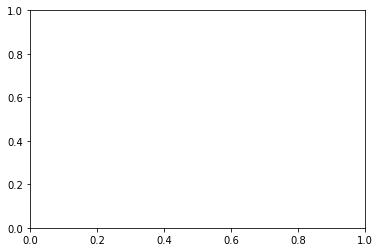

In [500]:
scatter(dis['A1'],dis['Vh'],c=labelsn)